In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [2]:
groceries = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/groceries/groceries.csv")

In [3]:
groceries.shape

(38766, 3)

In [4]:
groceries.head()

,Member_number,Date,itemDescription
0,1808,21/7/2015,tropical fruit
1,2552,5/1/2015,whole milk
2,2300,19/9/2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,1/2/2015,whole milk


In [5]:
all_transactions = [transaction[1]['itemDescription'].tolist() for transaction in list(groceries.groupby(['Member_number', 'Date']))]
len(all_transactions)

14964

In [6]:
all_transactions[0:10]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'curd'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['sausage', 'whole milk', 'rolls/buns']]

In [7]:
trans_encoder = TransactionEncoder() # Instanciate the encoder
trans_encoder_matrix = trans_encoder.fit(all_transactions).transform(all_transactions)
trans_encoder_matrix = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)
trans_encoder_matrix.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
def perform_rule_calculation(transact_items_matrix, rule_type="fpgrowth", min_support=0.001):
    start_time = 0
    total_execution = 0
    
    start_time = time.time()
    rule_items = fpgrowth(transact_items_matrix, 
                   min_support=min_support, 
                   use_colnames=True)
    total_execution = time.time() - start_time
    print("Computed Fp Growth!")

    rule_items['number_of_items'] = rule_items['itemsets'].apply(lambda x: len(x))
    
    return rule_items, total_execution
def compute_association_rule(rule_matrix, metric="lift", min_thresh=1):
    rules = association_rules(rule_matrix, 
                              metric=metric, 
                              min_threshold=min_thresh)
    
    return rules
def plot_metrics_relationship(rule_matrix, col1, col2):

    fit = np.polyfit(rule_matrix[col1], rule_matrix[col2], 1)
    fit_funt = np.poly1d(fit)
    plt.plot(rule_matrix[col1], rule_matrix[col2], 'yo', rule_matrix[col1], 
    fit_funt(rule_matrix[col1]))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('{} vs {}'.format(col1, col2))
val = {'name':12}
value = list(val.items())[0]
fpgrowth_matrix, fp_growth_exec_time = perform_rule_calculation(trans_encoder_matrix) # Run the algorithm
print("Fp Growth execution took: {} seconds".format(fp_growth_exec_time))

Computed Fp Growth!
Fp Growth execution took: 0.19058632850646973 seconds


In [9]:
fpgrowth_matrix.head()

,support,itemsets,number_of_items
0,0.157912,(whole milk),1
1,0.085873,(yogurt),1
2,0.060345,(sausage),1
3,0.009489,(semi-finished bread),1
4,0.051724,(pastry),1


In [10]:
fpgrowth_matrix.tail()

,support,itemsets,number_of_items
745,0.001403,"(chewing gum, yogurt)",2
746,0.001069,"(chewing gum, other vegetables)",2
747,0.001002,"(soda, chewing gum)",2
748,0.001069,"(whole milk, pasta)",2
749,0.001002,"(seasonal products, rolls/buns)",2


In [11]:
fp_growth_rule_lift = compute_association_rule(fpgrowth_matrix)
fp_growth_rule_lift.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(whole milk, yogurt)",(rolls/buns),0.011160,0.109997,0.001337,0.119760,1.088758,0.000109,1.011091
1,"(whole milk, rolls/buns)",(yogurt),0.013967,0.085873,0.001337,0.095694,1.114367,0.000137,1.010860
2,"(yogurt, rolls/buns)",(whole milk),0.007819,0.157912,0.001337,0.170940,1.082501,0.000102,1.015714
3,(whole milk),"(yogurt, rolls/buns)",0.157912,0.007819,0.001337,0.008464,1.082501,0.000102,1.000651
4,(yogurt),"(whole milk, rolls/buns)",0.085873,0.013967,0.001337,0.015564,1.114367,0.000137,1.001623


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(sausage, yogurt)",(whole milk),0.005747,0.157912,0.001470,0.255814,1.619975,0.000563,1.131555
1,"(sausage, rolls/buns)",(whole milk),0.005346,0.157912,0.001136,0.212500,1.345683,0.000292,1.069318


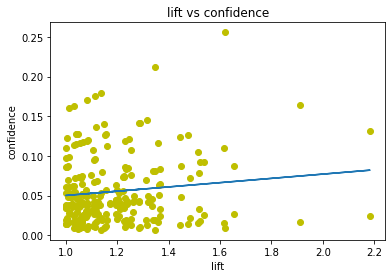

In [12]:
plot_metrics_relationship(fp_growth_rule_lift, col1='lift', col2='confidence')

fp_growth_rule = compute_association_rule(fpgrowth_matrix, metric="confidence", min_thresh=0.2)
fp_growth_rule.head()